$\newcommand{\calf}{{\cal F}}
\newcommand{\calk}{{\cal K}}
\newcommand{\calp}{{\cal P}}
\newcommand{\dnu}{d \nu}
\newcommand{\mf}{{\bf F}}
\newcommand{\md}{{\bf D}}
\newcommand{\mP}{{\bf P}}
\newcommand{\mU}{{\bf U}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\vw}{{\bf w}}
\newcommand{\vy}{{\bf y}}
\newcommand{\vf}{{\bf f}}
\newcommand{\vs}{{\bf s}}
\newcommand{\ve}{{\bf e}}
\newcommand{\vd}{{\bf d}}
\newcommand{\vb}{{\bf b}}
\newcommand{\vg}{{\bf g}}
\newcommand{\vz}{{\bf z}}
\newcommand{\vr}{{\bf r}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mg}{{\bf G}}
\newcommand{\mv}{{\bf V}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\mb}{{\bf B}}
\newcommand{\ball}{{\cal B}}
\newcommand{\ptc}{{\Psi TC}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\begeq}{{\begin{equation}}}
\newcommand{\endeq}{{\end{equation}}}
$

In [2]:
include("fanote_init.jl")

┌ Info: Precompiling NotebookSIAMFANL [top-level]
└ @ Base loading.jl:1317
  ** incremental compilation may be fatally broken for this module **



# Chapter 4: Fixed Point Problems and Anderson Acceleration

## Contents for Chapter 4




[Section 4.1: Fixed Point Problems](#Section-4.1:-Fixed-Point-Problems)

[Section 4.2: Anderson Acceleration](#Section-4.2:-Anderson-Acceleration)

[Section 4.3: Convergence Theory](#Section-4.3:-Convergence-Theory)

[Section 4.4: Two Examples](#Section-4.4:-Two-Examples)

[Section 4.5: Anderson Acceleration Solver](SIAMFANLCh4s.ipynb)

## Section 4.1: Fixed Point Problems

In this chapter we focus on fixed point problems
$$
\vx = \mg(\vx).
$$
While one might thing that there is little difference between fixed point
problems and nonlinear equations $\mf(\vx) = 0$, that would be wrong
<cite data-cite="nixon"><a href="siamfa.html#nixon">(Nix72)</cite>.

While simply replacing $\mf(\vx)$ with $\mg(\vx) - \vx$
and applying a form of Newton's method is reasonable in most cases,
that approach can miss important structural properties of $\mg$ and
requires computing a Jacobian or Jacobian-vector product, which is
not always possible. Conversely, applying a fixed point method to
a nonlinear equation with the transformation
$\mg(\vx) = \vx + \mf(\vx)$ can often lead to failure, even in the linear
case. Having said that, there are problems, such as the H-equation
from [Chapter 2](SIAMFANLCh2.ipynb)
 that can be expressed equally well
as nonlinear equations or fixed point problems.

The fundamental method for solving fixed point problems is
Picard or fixed point iteration
$$
\vx_{n+1} = \mg(\vx_n).
$$

Throughout this chapter we will assume that $\mg$ is a contraction on
a set $D \subset R^N$. This means that there is $c \in (0,1)$ such that
$$
\| \mg(\vx) - \mg(\vy) \| \le c \| \vx - \vy \|
$$
for all $\vx, \vy \in D$. We will call $c$ the
__contractivity constant__.

The
__Contraction Mapping Theorem__
 is

___
__Theorem 4.1.__
If $\mg$ is a contraction on $D \in R^N$ then there is a unique
solution $\vx^* \in D$ of \eqnok{fix} and for any $\vx_0 \in D$,
the iteration \eqnok{picard} converges to $\vx^*$. Moreover
the convergence is q-linear
$$
\| \ve_{n+1} \| \le c \| \ve_n \|.
$$
___

As in the previous chapters, $\ve = \vx - \vx^*$.

We remind the reader that the uniqueness in __Theorem 4.1__
means that $\vx^*$ is the only solution in $D$. If $\mg$ is
nonlinear, there could well be other fixed points outside of $D$.

Note that the theorem does not specify the norm $\| \cdot \|$. In fact
if $\mg$ is a contraction in any norm, the iteration will converge. One
does not have to know what that norm is, as the linear case illustrates.
If you measure convergence in a norm other than the one in which $\mg$ is
a contraction, you will still observe convergence, but not necessarily
q-linear convergence. At worst you will see
__r-linear convergence__

$$
\| \ve_n \| = O( c^n )
$$
or, equivalently
$$
\limsup_{n \to \infty}
\left( \frac{\| \ve_n \|}{\| \ve_0 \|} \right)^{1/n} \le c.
$$
    
It's worthwhile to consider the case of linear equations
$$
\ma \vx = \vb
$$
and linear fixed point problems
$$
\vx = \mm \vx + \vb.
$$
In the case of linear fixed point problems, contractivity of
$\mb(\vx) = \mm \vx + \vb$ means that $\| \mm \| < 1$ in some
operator norm, equivalently $\rho(\mm) < 1$. Here $\rho$ is
the
__spectral radius__
$$
\rho(\mm) = \max_{\lambda \in \sigma(\mm)} | \lambda |
$$
and $\sigma(\mm)$ is the set of eigenvalues of $\mm$.
This is the __Banach Lemma__

___
__Lemma 4.2.__
Suppose $\| \mm \| < 1$. Then for any $\vx_0 \in R^N$ the iteration
$$
\vx_{n+1} = \mm \vx_n + \vb
$$
converges to $\vx^* = (\mi - \mm)^{-1} \vb$. Moreover
$$
\| \ve_{n+1} \| \le \| \mm \| \| \ve_{n} \|.
$$
___

The Banach lemma differs from the Contraction Mapping theorem in that
the map $\mg(\vx) = \mm \vx + \vb$ is a contraction everywhere
(so $D = R^N$) if
$\| \mm \| < 1$. The Contraction Mapping theorem for nonlinear problems
is local in the sense that the domain $D$ is part of the assumptions.
Similarly to Newton's method, we can connect contractivity to
the Jacobian.

___
__Corollary 4.3.__
Suppose $\mg$ is continuously differentiable near a fixed point
$\vx^* = \mb(\vx^*)$ and that
$$
\| \mg'(\vx^*) \| < 1.
$$
Then there is $\delta > 0$ such that $\mg$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant
$$
c = \| \mg'(\vx^*) \| + O(\delta).
$$
___


### Section 4.1.1: Damping

Sometimes one can replace a noncontractive $\mg$ with
$$
\mg_\beta(\vx) = (1 - \beta) \vx + \beta \mg(\vx)
$$
so that $\mg_\beta$ is a contraction. Typically $-1 \le \beta \le 1$.
If one applies Picard iteration
to $\mg_\beta$ the resulting method is called
__damped Picard iteration__
$$
\vx_{n+1} = (1 - \beta) \vx_n + \beta \mg(\vx_n).
$$
So damped Picard iteration with $\beta = 1$ is just Picard iteration.

To see the limitations and possibilities of this approach, it helps
to consider the linear case. Suppose for some
$0 < \mu < 1 < K$,
$$
\sigma(\mm) \subset [-K, \mu]
$$
and so $\rho(\mm) \ge K > 1$. If we change $\mm$ to
$$
\mm_\beta = (1 - \beta) \mi + \beta \mm
$$
then for any $0 < \beta < 2/(K+1)$,
$$
\sigma(\mm_\beta)
\subset [1 - \beta (1 + K) , 1 - \beta (1 - \mu)]  \subset (-1, 1)
$$
and therefore $\rho(\mm_\beta) < 1$. Hence the iteration
$$
\vx_{n+1} = \mm_\beta \vx_n + \beta \vb =
(1 - \beta)\vx_n + \beta( \mm_\beta \vx_n + \vb)
$$
converges to the solution of
$$
\begin{array}{ll}
\vx^* & = \mm_\beta \vx^* + \beta \vb
= (1 - \beta)\vx^* + \beta( \mm_\beta \vx^* + \vb) \\
\\
& = \vx^* - \beta ( \vx^* - \mm \vx^* - \vb),
\end{array}
$$
and $\vx^* = \mm \vx^* + \vb$.

However, the convergence rate is slow if $K$ is large, for example if
$\beta = 1/(K+1)$ then
$$
\| \ve_{n+1} \| \le 1 - \beta (1 - \mu) = \frac{K + \mu}{K+1}
$$
which can be very close to one if $K$ is large or $\mu$ is close to
$1$.  So, while damping can
manufacture contractivity in some __(but not all)__ cases, the
convergence is likely to be poor. Similarly, if
$$
\sigma(\mm) \subset [-\mu, K]
$$
then any $-2/(K+1) < \beta < 0$ will work as a damping parameter.
Damping will not always work. If, for example, the eigenvalues of $\mm$
are $\pm 2$, no damping parameter will make $\rho(\mm_\beta) < 1$.

We now return to the nonlinear case and state an analog of
__Corollary 4.3__.

___
__Corollary 4.4.__
Suppose $\mg$ is continuously differentiable near a fixed point
$\vx^* = \mb(\vx^*)$ and that
there is $\beta$ such that
$$
\| ( 1 - \beta) \mi + \beta \mg(\vx^*) \| = {\hat c} < 1.
$$
Then for any $c \in ({\hat c}, 1)$
$\delta > 0$ such that $\mg_\beta$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant $c$.
___


### Section 4.1.2: Mapping Nonlinear Equations to Fixed Point Problems

If, and this is usually a lot to ask, you have a very good preconditioner
$\mP$ for $\mf(\vx) = 0$, you can apply the preconditioner from the left and
express the nonlinear equation as a
fixed point problem for
$$
\mg(\vx) = \vx - \mP \mf(\vx).
$$
Right preconditioning is similar and we will focus only on left preconditioning
in this section.

In order for a convergence result like __Corollary 4.4__ to hold
we need the standard assumptions for Newton's method and
also require that $\mP$ to be an
__approximate inverse__
for $\mf'(\vx^*)$. This means that
$$
\| \mi - \mP \mf'(\vx^*) \| < 1.
$$
In this case, if $\mg = \vx - \mP \mf(\vx)$ then
$$
\| \mg'(\vx^*) \| = \| \mi - \mP \mf'(\vx^*) \| < 1
$$
and we can apply __Corollary 4.4__ directly. It's worthwhile to
state the convergence result explicitly.

___

__Corollary 4.5.__
Let the standard assumptions hold and let $\mP$ be an approximate inverse
of $\mf'(\vx^*)$. Let 
$\mg = \vx - \mP \mf(\vx)$ and
$$
\| \mi - \mP \mf'(\vx^*) \| < c < 1.
$$
Then there is
$\delta > 0$ such that $\mg$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant $c$.
___

One can view any Newton like method as a fixed point iteration in this way.
For example if $\mP = \mf'(\vx_0)$, the fixed point iteration
is the chord method. If you allow $\mP$ to depend on $\vx$, then you
can analyze Newton's method itself as a fixed point iteration
<cite data-cite="ortega"><a href="siamfa.html#ortega">(OR70)</cite>.



### Section 4.1.3: Preconditioning Fixed Point Maps

If we start from a nonlinear equation $\mf(\vx)=0$ and an approximate
inverse for $\mf(\vx^*)$ the resulting fixed point map, then the resulting Picard iteration
converges. If, however, we start from a fixed point problem
$\mg(\vx) = \vx$, then the corresponding nonlinear equation, following
the convention from 
<cite data-cite="Anderson1965"><a href="siamfa.html#Anderson1965">(And65)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
is
$\mf(\vx) = \mg(\vx) - \vx$. This leads to an approach to preconditioning
$\mg$ by finding a good preconditioner for $\mf$
<cite data-cite="HerbstPrecond"><a href="siamfa.html#HerbstPrecond">(HL21)</cite>.
    
For example, if one can find an approximate inverse $\mP$ for
$$
\mf'(\vx^*) = \mg'(\vx^*) - \mi
$$
The one can apply the ideas in __Section 4.1.2__ and transform $\mg$ to
$$
\mg_{\mP} (\vx) =  \vx - \mP \mf(\vx)
= \vx - \mP (\mg(\vx) - \vx),
$$
which is a special case of equation (18) in
<cite data-cite="HerbstPrecond"><a href="siamfa.html#HerbstPrecond">(HL21)</cite>.


## Section 4.2: Anderson Acceleration

Anderson acceleration 
<cite data-cite="Anderson1965"><a href="siamfa.html#Anderson1965">(And65)</cite>
is an iterative method for fixed point problems.
The method was designed to accelerate Picard iteration.
Anderson acceleration was originally designed for integral equations
and is now very common in electronic structure
computations
(see <cite data-cite="dedrichszeller"><a href="siamfa.html#dedrichszeller">(DZ83)</cite>
and many references since then).
Anderson acceleration is essentially the same as
DIIS
(Direct Inversion on the Iterative Subspace)
<cite data-cite="Rohwedder2011"><a href="siamfa.html#Rohwedder2011">(RS11)</cite>,
<cite data-cite="Schneider2008"><a href="siamfa.html#Schneider2008">(SRNB08)</cite>
<cite data-cite="Lin2013"><a href="siamfa.html#Lin2013">(LY13)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>,
nonlinear GMRES
<cite data-cite="Miller2005"><a href="siamfa.html#Miller2005">(Mil05)</cite>,
<cite data-cite="Oosterlee2000"><a href="siamfa.html#Oosterlee2000">(OW00)</cite>,
<cite data-cite="Washio1997"><a href="siamfa.html#Washio1997">(WO97)</cite>,
<cite data-cite="Carlson1998"><a href="siamfa.html#Carlson1998">(CM98)</cite>,
and interface quasi-Newton
<cite data-cite="Degroote09"><a href="siamfa.html#Degroote09">(DBV09)</cite>,
<cite data-cite="Haelterman09"><a href="siamfa.html#Haelterman09">(HDvHV09)</cite>.
<cite data-cite="Linder15"><a href="siamfa.html#Linder15">(LMSU15)</cite>.                                          It is also closely related to
Pulay mixing
<cite data-cite="Pulay1982"><a href="siamfa.html#Pulay1982">(Pul82)</cite>.
also known as
CDIIS (Commutator DIIS),
<cite data-cite="Rohwedder2011"><a href="siamfa.html#Rohwedder2011">(RS11)</cite>,
<cite data-cite="Garza2012"><a href="siamfa.html#Garza2012">(GS12)</cite>,
<cite data-cite="Hu2017"><a href="siamfa.html#Hu2017">(HLY17)</cite>,
    <cite data-cite="Host2008"><a href="siamfa.html#Host2008">(HOJ<sup>+</sup>08)</cite>.
Other variations on the method include CROP (Conjugate Residual with OPtimal trial vectors)
<cite data-cite="Ettenhuber2015crop"><a href="siamfa.html#Ettenhuber2015crop">(EJ15)</cite>,
<cite data-cite="Ziolkowski2008crop"><a href="siamfa.html#Ziolkowski2008crop">(ZJWO08)</cite> and
EDIIS (Energy DIIS) <cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>.

Anderson acceleration is an important component of many electronic
structure codes. These, in turn, are critical parts of
quantum physics and chemistry codes. Three examples
are the RMG (Real Space Multigrid) large
scale electronic structure computations code <cite data-cite="rmg"><a href="siamfa.html#rmg12">(BSB95)</cite>,     <cite data-cite="rmg12"><a href="siamfa.html#rmg12">(MBH<sup>+</sup>12)</cite>,
the {\bf DFTK.jl} Julia package 
    \cite{DFTKjcon,HerbstPrecond},
and the Gaussian \cite{g16,Kudin2002} code for computational chemistry.
Other applications include
stiff dislocation dynamics 
    \cite{carol_dislocation},
hydrology \cite{Anderson_hydro},
neutron transport \cite{Willert2014,ctk:anderson2},
thermal radiation transport \cite{An2017},
fluid mechanics \cite{pollock1},
multiphysics coupling
\cite{alexthesis,ctk:alexmc,ctk:coupling}, and fluid-structure
interaction <cite data-cite="Ganine2012"><a href="siamfa.html#Ganine2012">(GJHC12)</cite>,
<cite data-cite="Degroote09"><a href="siamfa.html#Degroote09">(DBV09)</cite>,
<cite data-cite="Haelterman09"><a href="siamfa.html#Haelterman09">(HDvHV09)</cite>.
<cite data-cite="Linder15"><a href="siamfa.html#Linder15">(LMSU15)</cite>.     

Anderson acceleration is most useful when Newton's method
is not practical because obtaining approximate Jacobians or
Jacobian-vector products is too costly or not possible at all.
Comparisons indicate that Newton's method performs better when
even moderately accurate derivative information
can be had at reasonable cost
<cite data-cite="ctk:coupling"><a href="siamfa.html#ctkcoupling">(HBC<sup>+</sup>16)</cite>.
Having said that, there are cases when Anderson acceleration does
outperform an efficient implementation of Newton's method 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>.    
We give one example of this poorly understood phenomenon
in section 4.4.

Algorithm __anderson__ is the
the simplest form of the iteration, which is all we cover in this chapter.

![Alg4.1](Images/Alg4dot1.png)

## Section 4.3: Convergence Theory

## Section 4.4: Two Examples

### Chandresekhar H-equation

[1, 2, 3, 3, 3, 4]
Failure to converge in aasol.jl

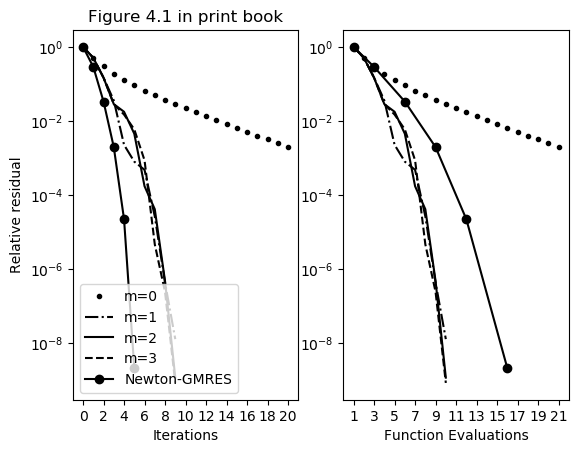

In [3]:
aa_heq();

### Convection-Diffusion Equation

Linear solver did not meet termination criterion at least once.
    This does not mean the nonlinear solver will fail. lmaxit= -1
Linear solver did not meet termination criterion at least once.
    This does not mean the nonlinear solver will fail. lmaxit= -1


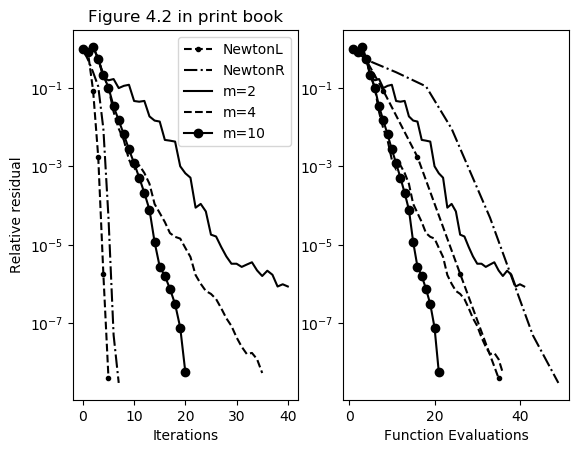

Failure to converge in aasol.jl


In [4]:
aa_pde();

## Next notebook = [Section 4.5: Solver for Chapter 4](SIAMFANLCh4s.ipynb)